# Import packages and declare functions

In [68]:
# import necessary packages

# data analysis
import pandas as pd 
import numpy as np

# pseudo random generator
import random

# plotters
import matplotlib.pyplot as plt
import networkx as nx

%matplotlib inline

In [69]:
def addColors(df):
    """Add random colors to the DataFrame to identify nodes

    Parameters:
    df (Pandas DataFrame): Data Frame that will receive the colors

    Returns:
    df_color (Pandas DataFrame): Data Frame with random colors in hex

   """
    # attribute colors to each primary key (name)
    df_color = df.copy()
    df_color['color'] = np.random.randint(0,0xFFFFFF, size=len(df_color))
    df_color['color'] = df_color['color'].apply(lambda x: str(hex(x))[2:]).astype(str)

    return df_color


In [70]:
def meltMatrix(df):
    """Adjusts the matrix so it can fit the networkx format

    Parameters:
    df (Pandas DataFrame): Data Frame that will be melted

    Returns:
    df_melt (Pandas DataFrame): Melted Data Frame

   """
    # melts the dataframe and removes empty data
    df_melt = df.copy()
    df_melt = df_melt.melt(id_vars=['Nome','color'],value_vars=df_melt.columns)
    df_melt.columns = ['nome1','color','nome2','relacao']
    df_melt.dropna(inplace=True, how='all',axis=1)
    df_melt.dropna(inplace=True)
    df_melt.reset_index(inplace=True)
    df_melt.drop(['index'],axis=1,inplace=True)

    return df_melt

In [71]:
def plotNetwork(df, colored_edges=False, out_name='network_output'):
    """Plots the networkx network and outputs it as a high resolution PNG

    Parameters:
    df (Pandas DataFrame): Data Frame that will be evaluated. Has to be in Person1 | Person2 | Level of Connection | Color, format
    colored_edges (bool): whether or not the edges will be colored. Default: False
    out_name (string): name of the output PNG file

    Returns:
    Nothing

    """

    # copies the dataframe to avoid memory overlap
    df_plot = df.copy()

    # substitutes low level connections so distant nodes will show up
    df_plot = df_plot[df_plot['relacao']>0.5]

    # instatiates a graph
    net = nx.Graph()

    # define variables
    source = df_plot['nome1']
    destination = df_plot['nome2']
    weights = df_plot['relacao']
    colors = df_plot['color'] # colors in hex
    colors_rgb = [list(np.random.choice(range(256), size=3)/255) for i in range(len(source.unique()))] # convert colors to rgb

    # decide on parameter based on user's choice
    if colored_edges==False:
        final_color_edges = 'grey'
        final_color_names = 'black'
    else:
        final_color_names = colors_rgb
        final_color_edges = colors_rgb

    for e in zip(source,destination,weights,colors):
        # defines elements in loop
        src = e[0]
        dst = e[1]
        rel = e[2]
        color = e[3]
        
        # add nodes
        net.add_node(src)

        # add edges
        net.add_edge(src,dst)
        
    # removes last names and surnames
    translation = dict(zip(df_plot['nome1'].unique(),[item.split(' ')[0] for item in df_plot['nome1'].unique()]))

    # declares a figure
    fig, ax = plt.subplots(figsize=(15,15))

    # creates a layout based on gravitation
    positions = nx.spring_layout(net, k=1, seed=42)

    # draws the edges
    nx.draw_networkx_edges(net,
                        positions,
                        alpha=0.3,
                        edge_color=final_color_edges,
                        width=weights*1.1)
    # node_size is declared locally because for some reason when I put a variable, it changed it size to 0. Could not fix that
    nx.draw_networkx_nodes(net,positions,
                        alpha=0,
                        node_size=(df.groupby('nome1').sum()['relacao']**2).loc[list(net.nodes())])

    # draws the names and scales their sizes according to scores
    from matplotlib.pyplot import text
    for idx,(node, (x, y)) in enumerate(positions.items()):
        text(x, y, translation[node], fontsize=net.degree[node]*0.8, ha='center', va='center',color=final_color_names if colored_edges==False else final_color_names[idx])

     
    # figure details
    plt.axis('off')
    plt.savefig(out_name + '.png', dpi=300)

# Data Wrangling

In [82]:
pd.read_excel('conexoes_hive.xlsx').head()

,Nome,Agatha Milena Castro,Alexandre Matheus Gomes,Antônia Lorena Raimunda Araújo,Arthur Benício Duarte,Ayla Sophia Nunes,Breno Tiago Pinto,Caroline Mariana Alessandra da Rosa,Cauã Mateus Martin Rodrigues,Débora Sarah Isabelly de Paula,...,Paulo João Araújo,Rafaela Tereza Patrícia Bernardes,Raquel Elaine Silva,Renan Mário Lima,Renata Carolina Assunção,Sarah Isabela Jaqueline Peixoto,Sophie Mariane dos Santos,Stefany Carla Rosângela Nascimento,Vicente Marcos Marcelo Santos,Vitor Martin Souza
0,Agatha Milena Castro,NaN,0.5,0.5,NaN,0.5,0.5,0.5,0.5,0.5,...,0.5,0.5,NaN,0.5,0.5,1.0,0.5,0.5,0.5,1.0
1,Alexandre Matheus Gomes,0.5,NaN,0.5,NaN,0.5,2.0,0.5,2.0,0.5,...,0.5,0.5,NaN,0.5,0.5,0.5,1.0,0.5,0.5,0.5
2,Antônia Lorena Raimunda Araújo,0.5,0.5,NaN,NaN,0.5,1.0,1.0,0.5,2.0,...,0.5,2.0,NaN,2.0,0.5,2.0,0.5,2.0,0.5,0.5
3,Arthur Benício Duarte,0.5,2.0,0.5,NaN,0.5,2.0,0.5,2.0,0.5,...,0.5,0.5,NaN,1.0,2.0,2.0,2.0,0.5,1.0,2.0
4,Ayla Sophia Nunes,0.5,0.5,0.5,NaN,NaN,2.0,0.5,0.5,0.5,...,1.0,1.0,NaN,2.0,1.0,0.5,2.0,1.0,0.5,2.0


In [72]:
# wrangle for the hive team
df_hive = pd.read_excel('conexoes_hive.xlsx')
df_hive = addColors(df_hive)
df_hive = meltMatrix(df_hive)
df_hive.head()

,nome1,color,nome2,relacao
0,Alexandre Matheus Gomes,5ec13a,Agatha Milena Castro,0.5
1,Antônia Lorena Raimunda Araújo,d00a2,Agatha Milena Castro,0.5
2,Arthur Benício Duarte,54befb,Agatha Milena Castro,0.5
3,Ayla Sophia Nunes,6b779f,Agatha Milena Castro,0.5
4,Breno Tiago Pinto,532355,Agatha Milena Castro,0.5


In [73]:
# wrangle for the corujas team 
df_corujas = pd.read_excel('conexoes_corujas.xlsx')
df_corujas = addColors(df_corujas)
df_corujas = meltMatrix(df_corujas)
df_corujas.head()

,nome1,color,nome2,relacao
0,Andrea Valentina Heloisa Pinto,491143,Allana Eloá Rodrigues,1.0
1,Bernardo Tomás Pietro Porto,6e7b71,Allana Eloá Rodrigues,2.0
2,Brenda Josefa Ramos,fa2340,Allana Eloá Rodrigues,2.0
3,Bryan Breno da Costa,8a825c,Allana Eloá Rodrigues,2.0
4,Bryan Luan Peixoto,488596,Allana Eloá Rodrigues,1.0


# Plots

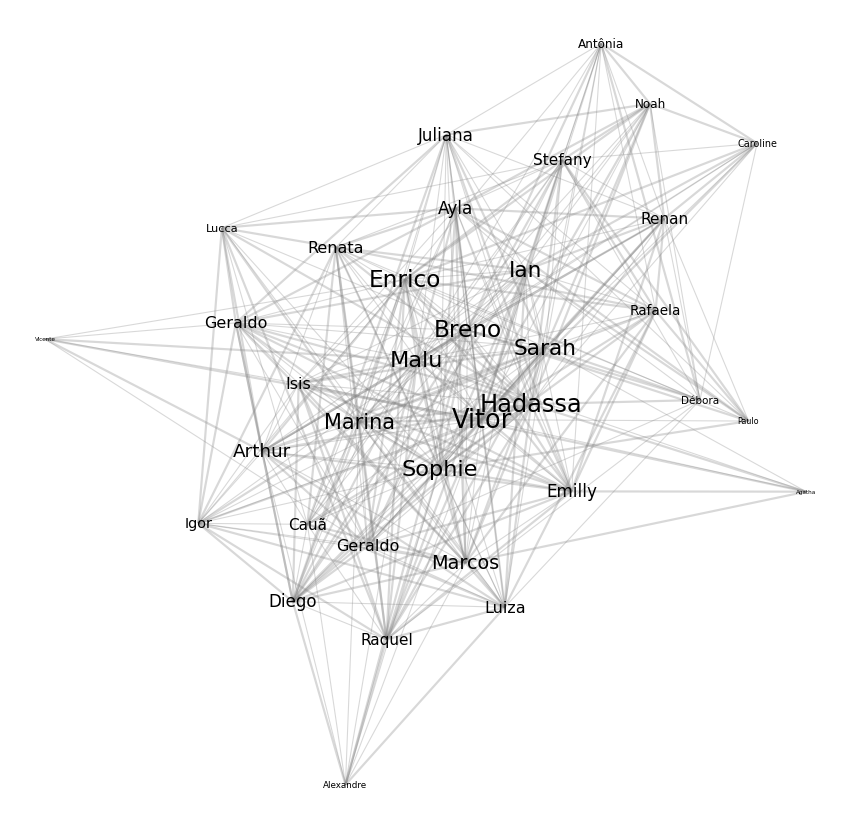

In [75]:
plotNetwork(df_hive,out_name='hive_single_color')

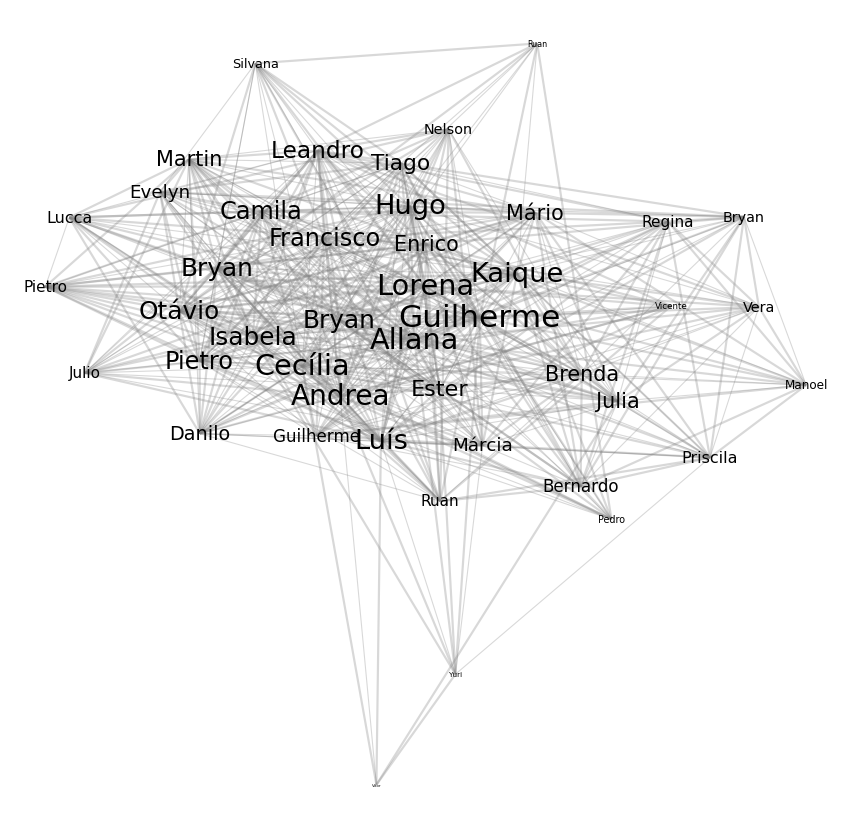

In [76]:
plotNetwork(df_corujas,out_name='corujas_single_color')

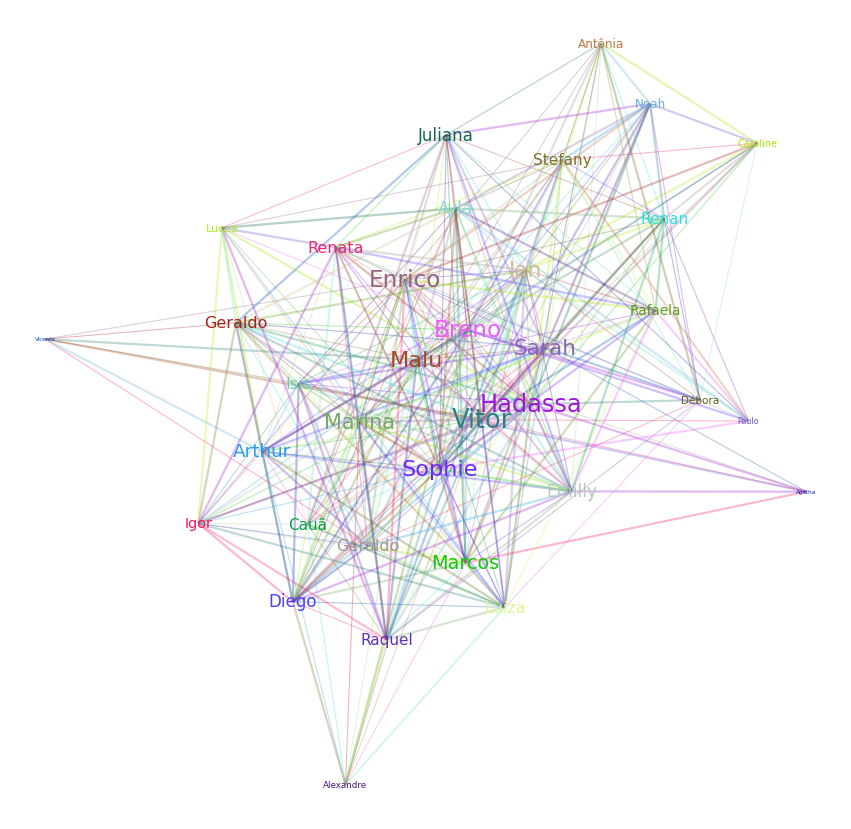

In [77]:
plotNetwork(df_hive,colored_edges=True,out_name='hive_colored')

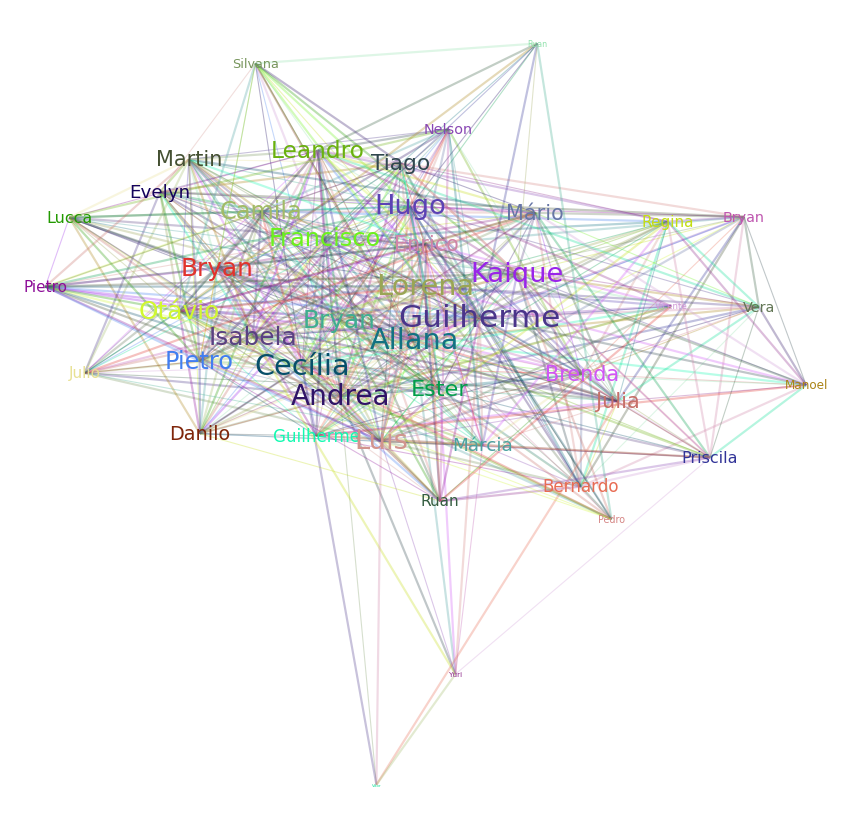

In [79]:
plotNetwork(df_corujas,colored_edges=True,out_name='corujas_colored')